IMPORTAMOS LIBRERIAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ESTABLECER APARIENCIAS DE GRAFICOS


In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

sex_color = {
    'Male':'#ff6602ff',
    'Female':'#0f7175ff'
}

CARGAR EL DATASET


In [4]:
df_ataque=pd.read_csv('/content/sample_data/heart_attack_dataset.csv')
df_ataque

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1        0  ...   
1            1               1        1        1  ...   
2            1               0        0        0  ...   
3            1               1        1        0  ...   
4            1               1        1        1  ...   
...        ...             ...      ...      ...  ...   
8758         1               1        1        0  ...   
8759         1               0        0        1  ...   
8760         0               1        1        1  ...   
8761         1               0        1        0  ...   
8762         1               1        0        0  ...   

      Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                    6.615001  261404  31.251233            286   
1                    4.963459  285768  27.194973            235   
2                    9.463426  235282  28.176571            587   
3                    7.648981  125640  36.464704            378   
4                    1.514821  160555  21.809144            231   
...                       ...     ...        ...            ...   
8758                10.806373  235420  19.655895             67   
8759                 3.833038  217881  23.993866            617   
8760                 2.375214   36998  35.406146            527   
8761                 0.029104  209943  27.294020            114   
8762                 9.005234  247338  32.914151            180   

      Physical Activity Days Per Week  Sleep Hours Per Day         Country  \
0                                   0                    6       Argentina   
1                                   1                    7          Canada   
2                                   4                    4          France   
3                                   3                    4          Canada   
4                                   1                    5        Thailand   
...                               ...                  ...             ...   
8758                                7                    7        Thailand   
8759                                4                    9          Canada   
8760                                4                    4          Brazil   
8761                                2                    8          Brazil   
8762                                7                    4  United Kingdom   

          Continent           Hemisphere  Heart Attack Risk  
0     South America  Southern Hemisphere                  0  
1     North America  Northern Hemisphere                  0  
2            Europe  Northern Hemisphere                  0  
3     North America  Northern Hemisphere                  0  
4              Asia  Northern Hemisphere                  0  
...             ...                  ...                ...  
8758           Asia  Northern Hemisphere                  0  
8759  North America  Northern Hemisphere                  0  
8760  South America  Southern Hemisphere                  1  
8761  South America  Southern Hemisphere                  0  
8762         Europe  Northern H

ANALISIS DE TIPOS DE DATOS

In [5]:
df_ataque.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere                          object
Heart Attack Risk                    int64
dtype: object

In [6]:
df_ataque.dtypes.value_counts()

int64      16
object      7
float64     3
Name: count, dtype: int64

In [7]:
df_ataque.shape

(8763, 26)

In [8]:
df_ataque.isnull().any()

Patient ID                         False
Age                                False
Sex                                False
Cholesterol                        False
Blood Pressure                     False
Heart Rate                         False
Diabetes                           False
Family History                     False
Smoking                            False
Obesity                            False
Alcohol Consumption                False
Exercise Hours Per Week            False
Diet                               False
Previous Heart Problems            False
Medication Use                     False
Stress Level                       False
Sedentary Hours Per Day            False
Income                             False
BMI                                False
Triglycerides                      False
Physical Activity Days Per Week    False
Sleep Hours Per Day                False
Country                            False
Continent                          False
Hemisphere                         False
Heart Attack Risk                  False
dtype: bool

In [9]:
df_ataque.isnull().sum().sort_values(ascending=False)

Patient ID                         0
Age                                0
Hemisphere                         0
Continent                          0
Country                            0
Sleep Hours Per Day                0
Physical Activity Days Per Week    0
Triglycerides                      0
BMI                                0
Income                             0
Sedentary Hours Per Day            0
Stress Level                       0
Medication Use                     0
Previous Heart Problems            0
Diet                               0
Exercise Hours Per Week            0
Alcohol Consumption                0
Obesity                            0
Smoking                            0
Family History                     0
Diabetes                           0
Heart Rate                         0
Blood Pressure                     0
Cholesterol                        0
Sex                                0
Heart Attack Risk                  0
dtype: int64

NO HAY DATOS NULOS

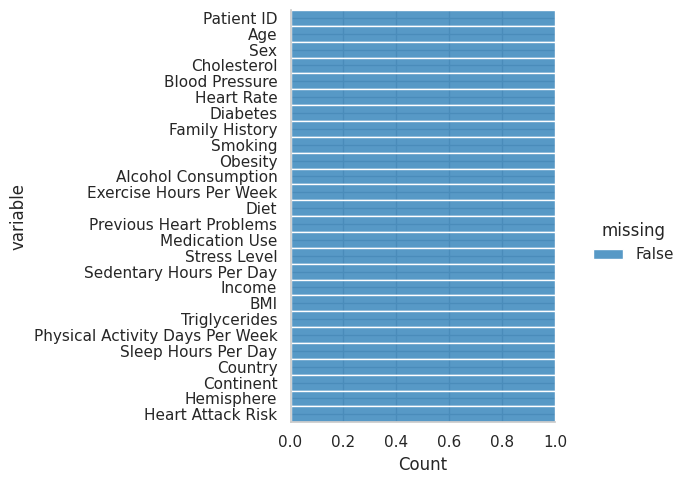

In [10]:
plot_null_ataque=df_ataque.isnull().melt(value_name='missing')
sns.displot(data=plot_null_ataque,y='variable',hue='missing',multiple='fill',aspect=1.2)

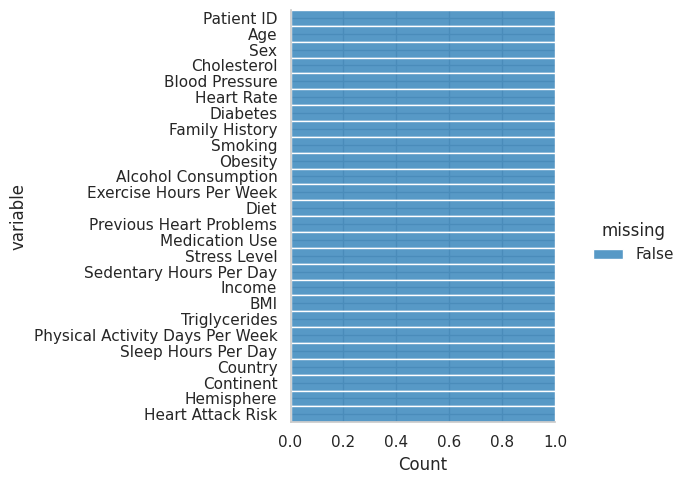

In [11]:
(
    df_ataque
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=1.2
            )
        )
    )
)

NO EXISTEN DATOS NULOS

<Axes: >

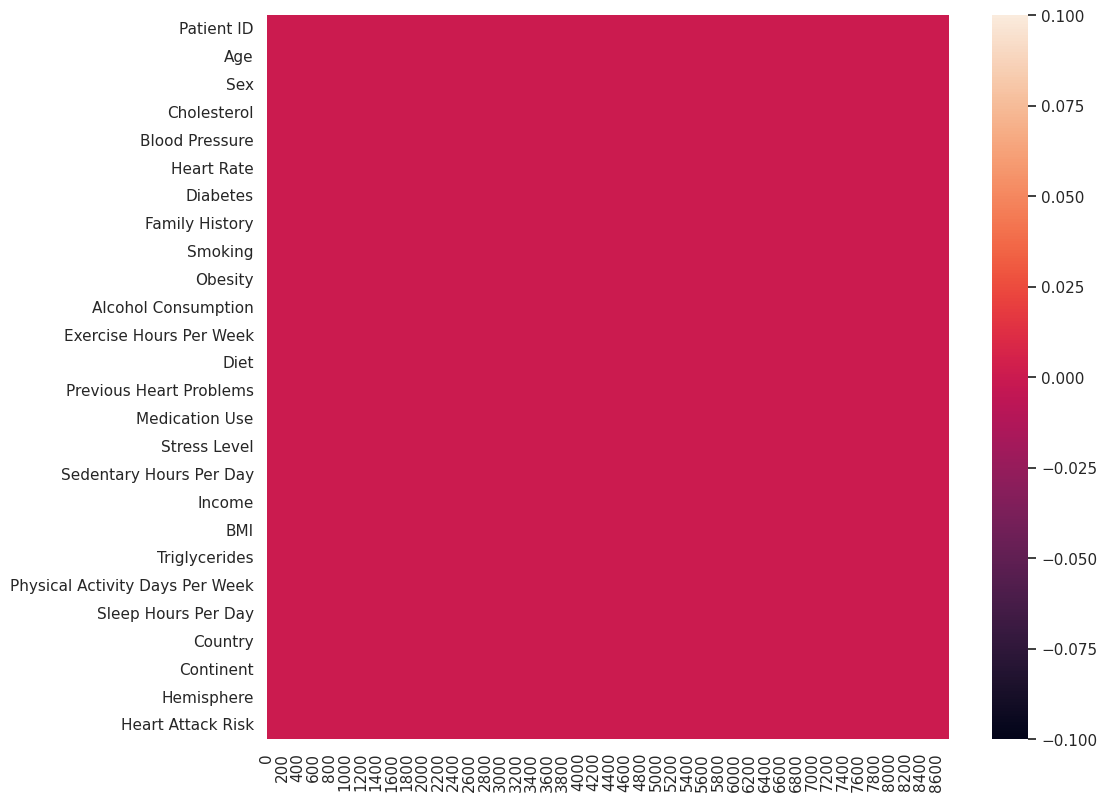

In [12]:

(
    df_ataque
    .isnull()
    .transpose()
    .pipe(
        lambda df : sns.heatmap(data=df)
    )
)

In [13]:
df_ataque.shape

(8763, 26)

In [14]:
df_ataque.dropna().shape

(8763, 26)

NO HAY DATOS NULOS, POR ESO NO COMPLETO LO DEMÁS

MEDIDAS DE TENDENCIA CENTRAL

In [15]:
df_ataque.mean(numeric_only=True)

Age                                    53.707977
Cholesterol                           259.877211
Heart Rate                             75.021682
Diabetes                                0.652288
Family History                          0.492982
Smoking                                 0.896839
Obesity                                 0.501426
Alcohol Consumption                     0.598083
Exercise Hours Per Week                10.014284
Previous Heart Problems                 0.495835
Medication Use                          0.498345
Stress Level                            5.469702
Sedentary Hours Per Day                 5.993690
Income                             158263.181901
BMI                                    28.891446
Triglycerides                         417.677051
Physical Activity Days Per Week         3.489672
Sleep Hours Per Day                     7.023508
Heart Attack Risk                       0.358211
dtype: float64

In [16]:
df_ataque.mode(numeric_only=True)

Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0     90.0        235.0        94.0       1.0             0.0      1.0   
1      NaN          NaN         NaN       NaN             NaN      NaN   
2      NaN          NaN         NaN       NaN             NaN      NaN   
3      NaN          NaN         NaN       NaN             NaN      NaN   
4      NaN          NaN         NaN       NaN             NaN      NaN   
...    ...          ...         ...       ...             ...      ...   
8758   NaN          NaN         NaN       NaN             NaN      NaN   
8759   NaN          NaN         NaN       NaN             NaN      NaN   
8760   NaN          NaN         NaN       NaN             NaN      NaN   
8761   NaN          NaN         NaN       NaN             NaN      NaN   
8762   NaN          NaN         NaN       NaN             NaN      NaN   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
0         1.0                  1.0                 0.002442   
1         NaN                  NaN                 0.004443   
2         NaN                  NaN                 0.005109   
3         NaN                  NaN                 0.007422   
4         NaN                  NaN                 0.008115   
...       ...                  ...                      ...   
8758      NaN                  NaN                19.986355   
8759      NaN                  NaN                19.990822   
8760      NaN                  NaN                19.997012   
8761      NaN                  NaN                19.997891   
8762      NaN                  NaN                19.998709   

      Previous Heart Problems  Medication Use  Stress Level  \
0                         0.0             0.0           2.0   
1                         NaN             NaN           NaN   
2                         NaN             NaN           NaN   
3                         NaN             NaN           NaN   
4                         NaN             NaN           NaN   
...                       ...             ...           ...   
8758                      NaN             NaN           NaN   
8759                      NaN             NaN           NaN   
8760                      NaN             NaN           NaN   
8761                      NaN             NaN           NaN   
8762                      NaN             NaN           NaN   

      Sedentary Hours Per Day    Income        BMI  Triglycerides  \
0                    0.001263  225278.0  18.002337          799.0   
1                    0.001529       NaN  18.004211            NaN   
2                    0.003625       NaN  18.009025            NaN   
3                    0.008307       NaN  18.013606            NaN   
4                    0.010631       NaN  18.016191            NaN   
...                       ...       ...        ...            ...   
8758                11.985484       NaN  39.985120            NaN   
8759                11.987716       NaN  39.986127            NaN   
8760                11.989217       NaN  39.989915            NaN   
8761                11.992341       NaN  39.993581            NaN   
8762                11.999313       NaN  39.997211            NaN   

      Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
0                                 3.0                 10.0                0.0  
1                                 NaN                  NaN                NaN  
2                                 NaN                  NaN                NaN  
3                                 NaN                  NaN                NaN  
4                                 NaN                  NaN                NaN  
...                               ...                  ...                ...  
8758                              NaN                  NaN                NaN  
8759                              NaN                  NaN                NaN  
8760                              NaN                  

MEDIDAS DE DISPERSIÓN

In [17]:
df_ataque.max(numeric_only=True)

Age                                    90.000000
Cholesterol                           400.000000
Heart Rate                            110.000000
Diabetes                                1.000000
Family History                          1.000000
Smoking                                 1.000000
Obesity                                 1.000000
Alcohol Consumption                     1.000000
Exercise Hours Per Week                19.998709
Previous Heart Problems                 1.000000
Medication Use                          1.000000
Stress Level                           10.000000
Sedentary Hours Per Day                11.999313
Income                             299954.000000
BMI                                    39.997211
Triglycerides                         800.000000
Physical Activity Days Per Week         7.000000
Sleep Hours Per Day                    10.000000
Heart Attack Risk                       1.000000
dtype: float64

In [18]:
df_ataque.min(numeric_only=True)

Age                                   18.000000
Cholesterol                          120.000000
Heart Rate                            40.000000
Diabetes                               0.000000
Family History                         0.000000
Smoking                                0.000000
Obesity                                0.000000
Alcohol Consumption                    0.000000
Exercise Hours Per Week                0.002442
Previous Heart Problems                0.000000
Medication Use                         0.000000
Stress Level                           1.000000
Sedentary Hours Per Day                0.001263
Income                             20062.000000
BMI                                   18.002337
Triglycerides                         30.000000
Physical Activity Days Per Week        0.000000
Sleep Hours Per Day                    4.000000
Heart Attack Risk                      0.000000
dtype: float64

DESVIACIÓN STANDARD

In [19]:
df_ataque.std(numeric_only=True)

Age                                   21.249509
Cholesterol                           80.863276
Heart Rate                            20.550948
Diabetes                               0.476271
Family History                         0.499979
Smoking                                0.304186
Obesity                                0.500026
Alcohol Consumption                    0.490313
Exercise Hours Per Week                5.783745
Previous Heart Problems                0.500011
Medication Use                         0.500026
Stress Level                           2.859622
Sedentary Hours Per Day                3.466359
Income                             80575.190806
BMI                                    6.319181
Triglycerides                        223.748137
Physical Activity Days Per Week        2.282687
Sleep Hours Per Day                    1.988473
Heart Attack Risk                      0.479502
dtype: float64

In [20]:
(df_ataque.quantile(q=[0.25,0.50,0.75],numeric_only=True)
 .transpose()
 .rename_axis('metric')
 .reset_index()
 .assign(iqr=lambda df: df[0.75]-df[0.25]))

metric          0.25            0.5  \
0                               Age     35.000000      54.000000   
1                       Cholesterol    192.000000     259.000000   
2                        Heart Rate     57.000000      75.000000   
3                          Diabetes      0.000000       1.000000   
4                    Family History      0.000000       0.000000   
5                           Smoking      1.000000       1.000000   
6                           Obesity      0.000000       1.000000   
7               Alcohol Consumption      0.000000       1.000000   
8           Exercise Hours Per Week      4.981579      10.069559   
9           Previous Heart Problems      0.000000       0.000000   
10                   Medication Use      0.000000       0.000000   
11                     Stress Level      3.000000       5.000000   
12          Sedentary Hours Per Day      2.998794       5.933622   
13                           Income  88310.000000  157866.000000   
14                              BMI     23.422985      28.768999   
15                    Triglycerides    225.500000     417.000000   
16  Physical Activity Days Per Week      2.000000       3.000000   
17              Sleep Hours Per Day      5.000000       7.000000   
18                Heart Attack Risk      0.000000       0.000000   

             0.75            iqr  
0       72.000000      37.000000  
1      330.000000     138.000000  
2       93.000000      36.000000  
3        1.000000       1.000000  
4        1.000000       1.000000  
5        1.000000       0.000000  
6        1.000000       1.000000  
7        1.000000       1.000000  
8       15.050018      10.068439  
9        1.000000       1.000000  
10       1.000000       1.000000  
11       8.000000       5.000000  
12       9.019124       6.020331  
13  227749.000000  139439.000000  
14      34.324594      10.901609  
15     612.000000     386.500000  
16       5.000000       3.000000  
17       9.000000       4.000000  
18       1.000000       1.000000

GRAFICAMOS MEDIDAS CENTRALES Y DISPERSIÓN DE LA VARIABLE


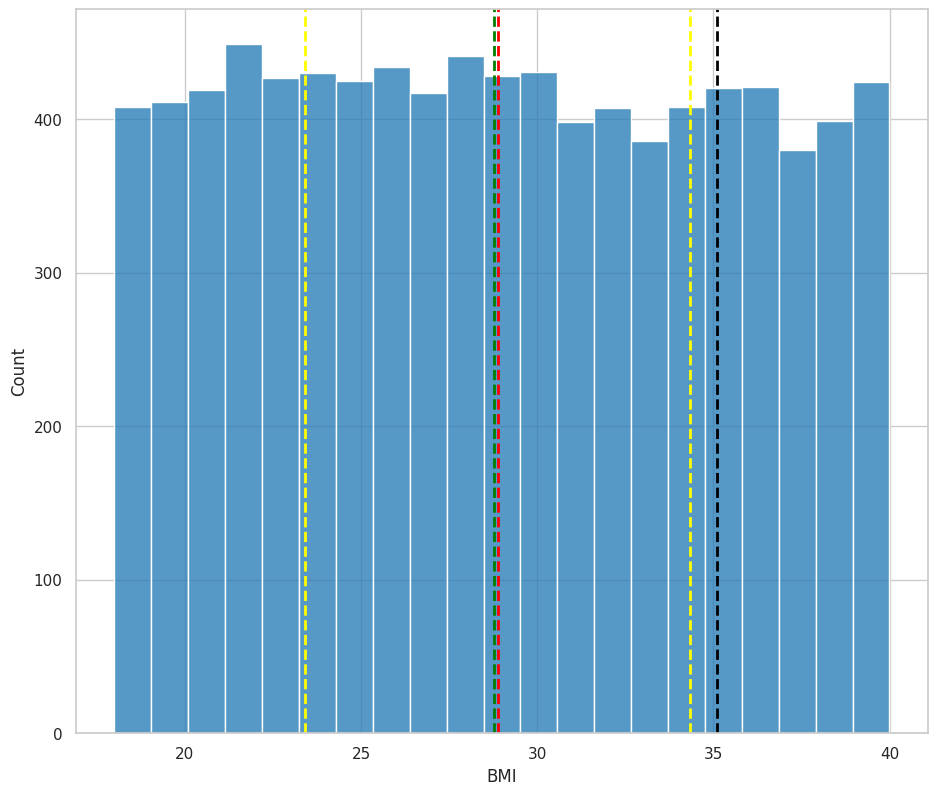

In [21]:
sns.histplot(
    data=df_ataque,
    x='BMI'
)
plt.axvline(
    x=df_ataque.BMI.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_ataque.BMI.median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_ataque.BMI.median() + df_ataque.BMI.std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_ataque.BMI.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_ataque.BMI.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)


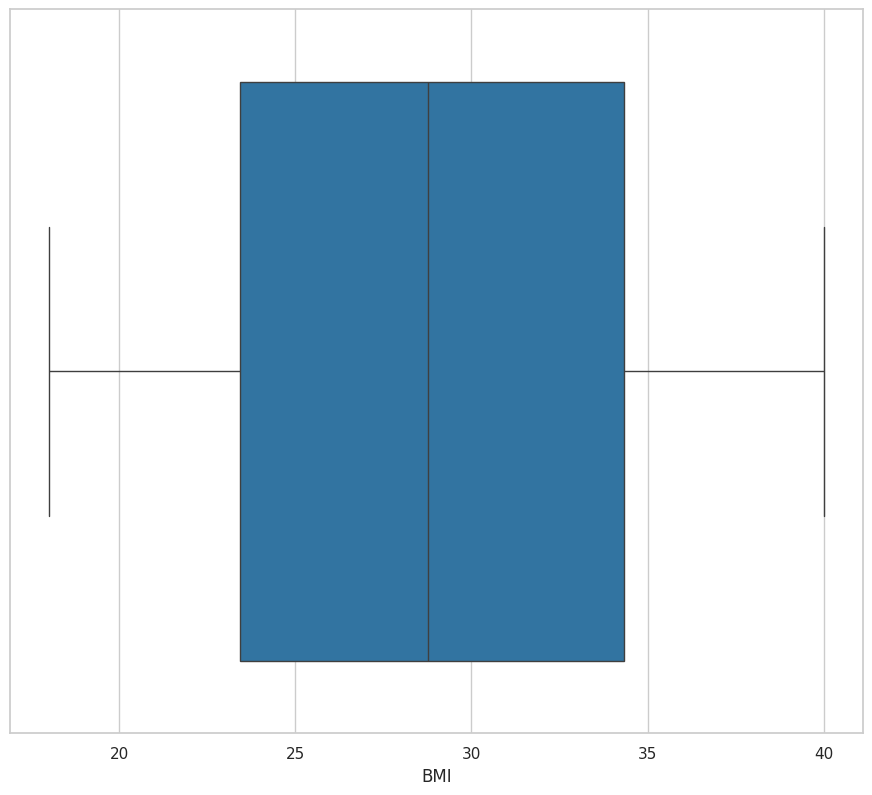

In [22]:
sns.boxplot(x=df_ataque.BMI)
plt.show()


CONTEOS Y PROPORCIONES

In [23]:
df_ataque.describe()

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313                 5.783745   
min       0.000000     0.000000             0.000000                 0.002442   
25%       1.000000     0.000000             0.000000                 4.981579   
50%       1.000000     1.000000             1.000000                10.069559   
75%       1.000000     1.000000             1.000000                15.050018   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  Medication Use  Stress Level  \
count              8763.000000     8763.000000   8763.000000   
mean                  0.495835        0.498345      5.469702   
std                   0.500011        0.500026      2.859622   
min                   0.000000        0.000000      1.000000   
25%                   0.000000        0.000000      3.000000   
50%                   0.000000        0.000000      5.000000   
75%                   1.000000        1.000000      8.000000   
max                   1.000000        1.000000     10.000000   

       Sedentary Hours Per Day         Income          BMI  Triglycerides  \
count              8763.000000    8763.000000  8763.000000    8763.000000   
mean                  5.993690  158263.181901    28.891446     417.677051   
std                   3.466359   80575.190806     6.319181     223.748137   
min                   0.001263   20062.000000    18.002337      30.000000   
25%                   2.998794   88310.000000    23.422985     225.500000   
50%                   5.933622  157866.000000    28.768999     417.000000   
75%                   9.019124  227749.000000    34.324594     612.000000   
max                  11.999313  299954.000000    39.997211     800.000000   

       Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
count                      8763.000000          8763.000000        8763.000000  
mean                          3.489672             7.023508           0.358211  
std                           2.282687             1.988473           0.479502  
min                           0.000000             4.000000           0.000000  
25%                           2.000000             5.000000           0.000000  
50%                           3.000000             7.000000           0.000000  
75%                           5.000000             9.000000           1.000000  
max                           7.000000            10.000000           1.000000

In [25]:
df_ataque.describe(include='object')

Patient ID   Sex Blood Pressure     Diet  Country Continent  \
count        8763  8763           8763     8763     8763      8763   
unique       8763     2           3915        3       20         6   
top       BMW7812  Male         146/94  Healthy  Germany      Asia   
freq            1  6111              8     2960      477      2543   

                 Hemisphere  
count                  8763  
unique                    2  
top     Northern Hemisphere  
freq                   5660

ANALIZAMOS CATEGORICO SEX

<Axes: xlabel='Sex'>

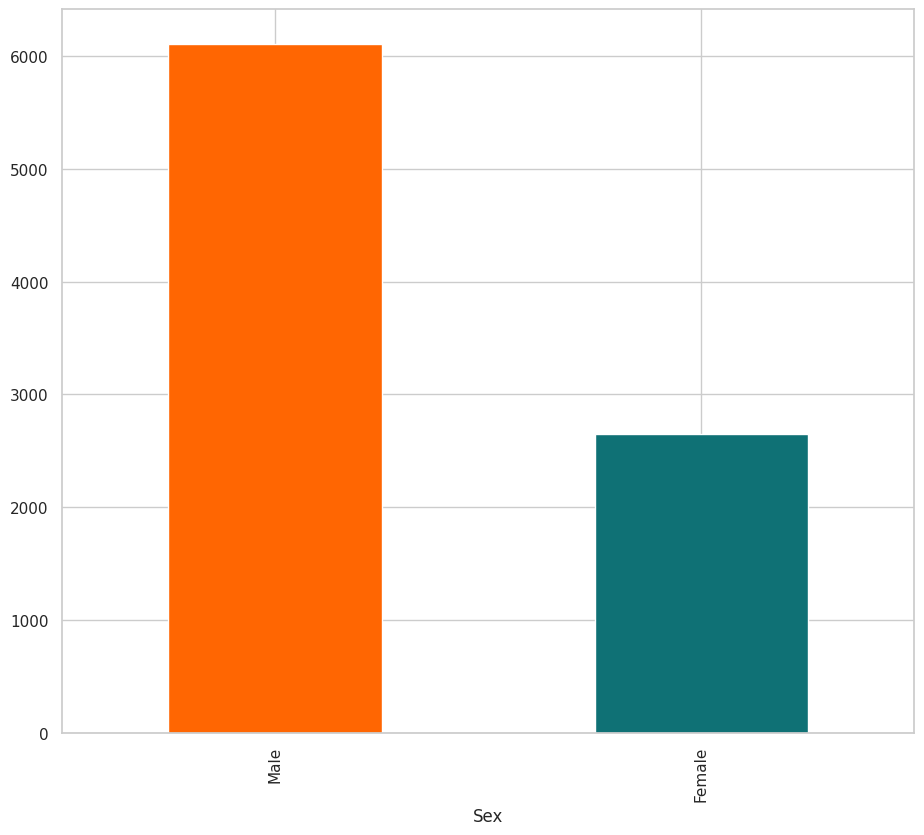

In [24]:
(
    df_ataque
    .Sex
    .value_counts()
    .plot(
        kind='bar',
        color=sex_color.values()
    )
)

PROPORCIÓN DE DATOS


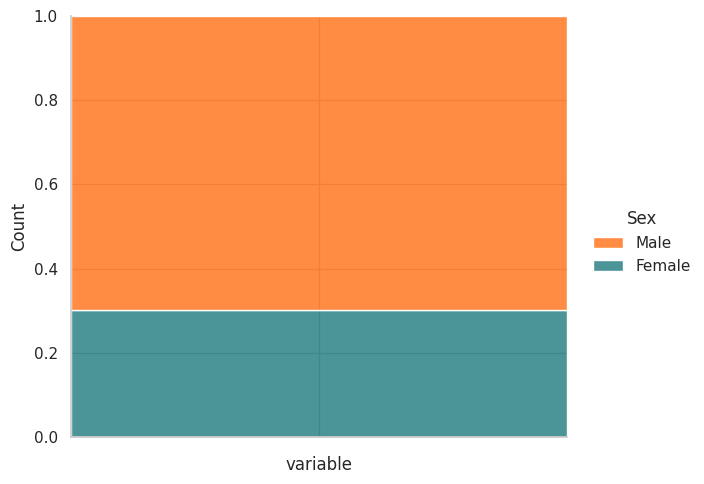

In [26]:
df_ataque['variable'] = ''
(
    df_ataque
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='Sex',
                multiple='fill',
                palette=sex_color,
                aspect=1.2
            )
        )
    )
)


ANALISIS BIVARIADO

In [27]:
df_ataque.head(2)

Patient ID  Age   Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67  Male          208         158/88          72         0   
1    CZE1114   21  Male          389         165/93          98         1   

   Family History  Smoking  Obesity  ...  Income        BMI Triglycerides  \
0               0        1        0  ...  261404  31.251233           286   
1               1        1        1  ...  285768  27.194973           235   

   Physical Activity Days Per Week  Sleep Hours Per Day    Country  \
0                                0                    6  Argentina   
1                                1                    7     Canada   

       Continent           Hemisphere  Heart Attack Risk  variable  
0  South America  Southern Hemisphere                  0            
1  North America  Northern Hemisphere                  0            

[2 rows x 27 columns]

<Axes: xlabel='Age', ylabel='BMI'>

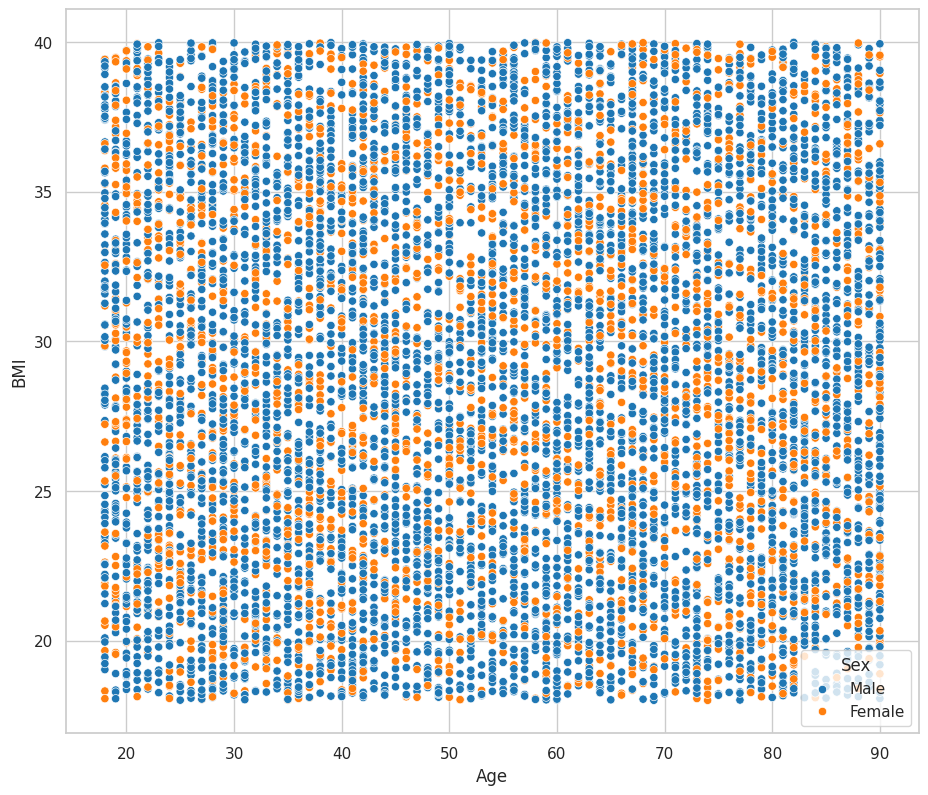

In [28]:

sns.scatterplot(
    data=df_ataque,
     x='Age',
    y='BMI',
    hue='Sex',
)

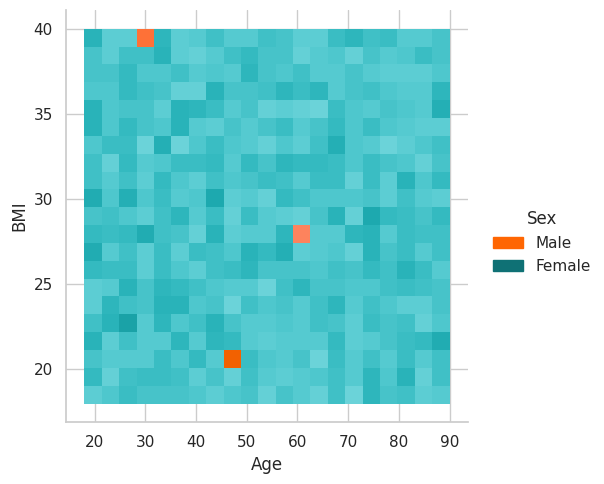

In [30]:
sns.displot(
    data=df_ataque,
    x='Age',
    y='BMI',
    hue='Sex',
    palette=sex_color
)

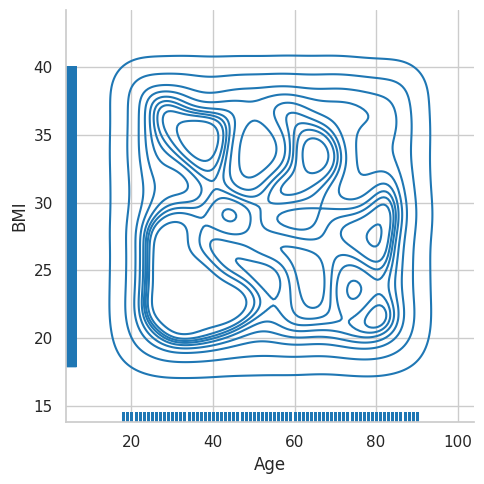

In [31]:
sns.displot(
    data=df_ataque,
    x='Age',
    y='BMI',
    kind='kde',
    rug=True
)

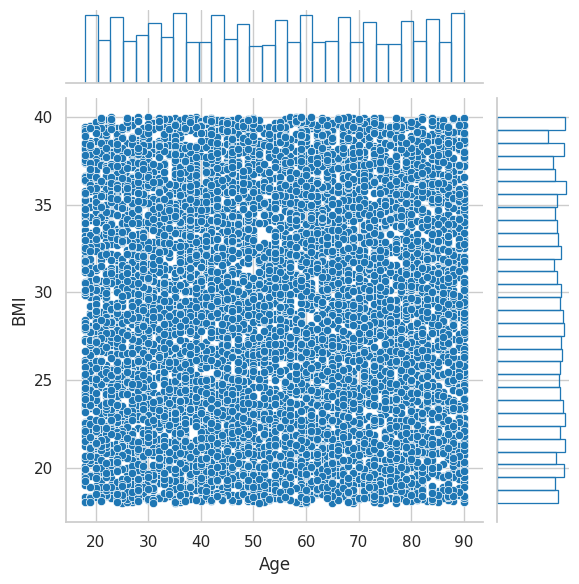

In [32]:
sns.jointplot(
    data=df_ataque,
     x='Age',
    y='BMI',
    marginal_kws=dict(bins=30,fill=False)
)

<Axes: xlabel='Age', ylabel='BMI'>

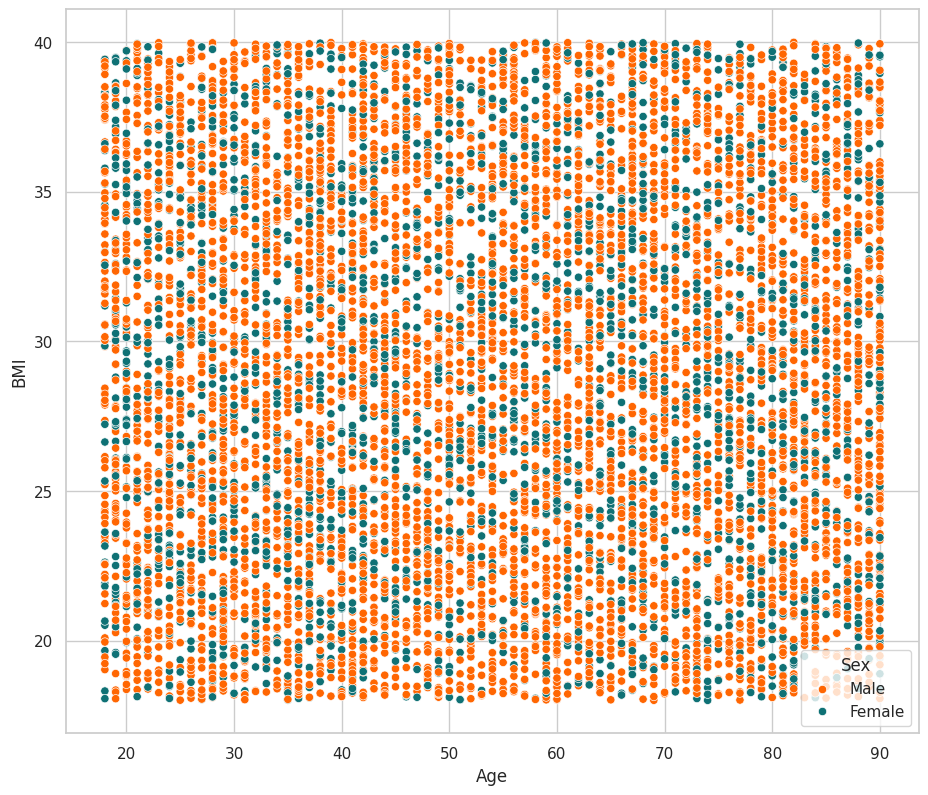

In [33]:
sns.scatterplot(
    data=df_ataque,
    x='Age',
    y='BMI',
    hue='Sex',
    palette=sex_color
)

GENERAMOS RUIDO EN LOS VALORES



<ipython-input-34-c2677ac4353e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


<Axes: xlabel='Sex', ylabel='BMI'>

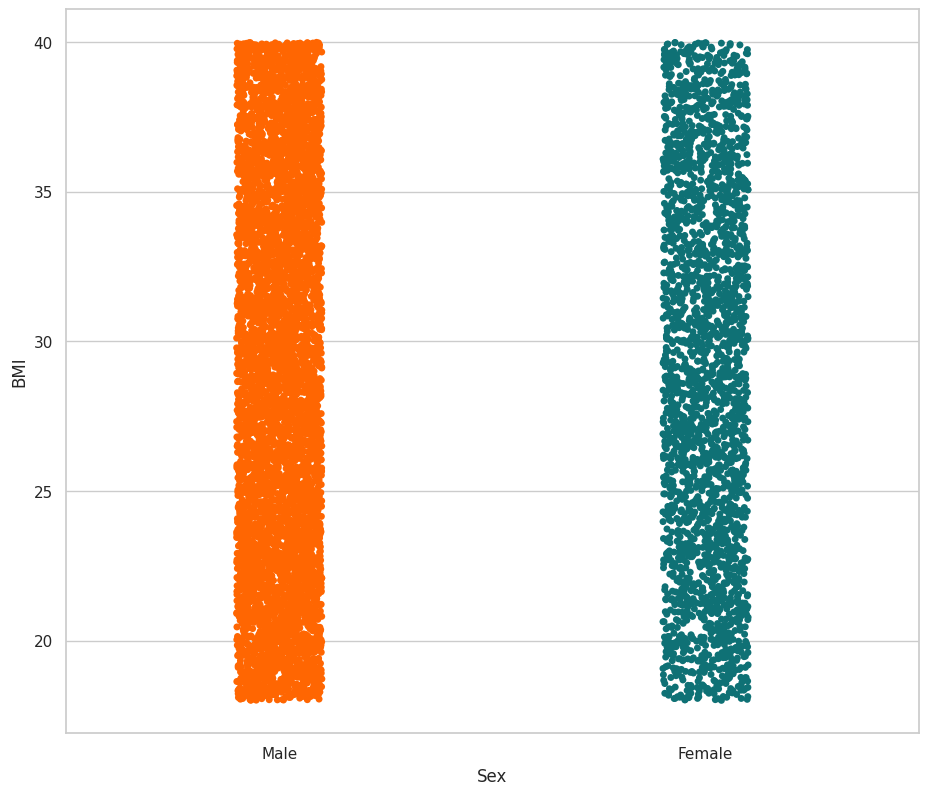

In [34]:
sns.stripplot(
    data=df_ataque,
    x='Sex',
    y='BMI',
    palette=sex_color
)

<ipython-input-35-06be13055649>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


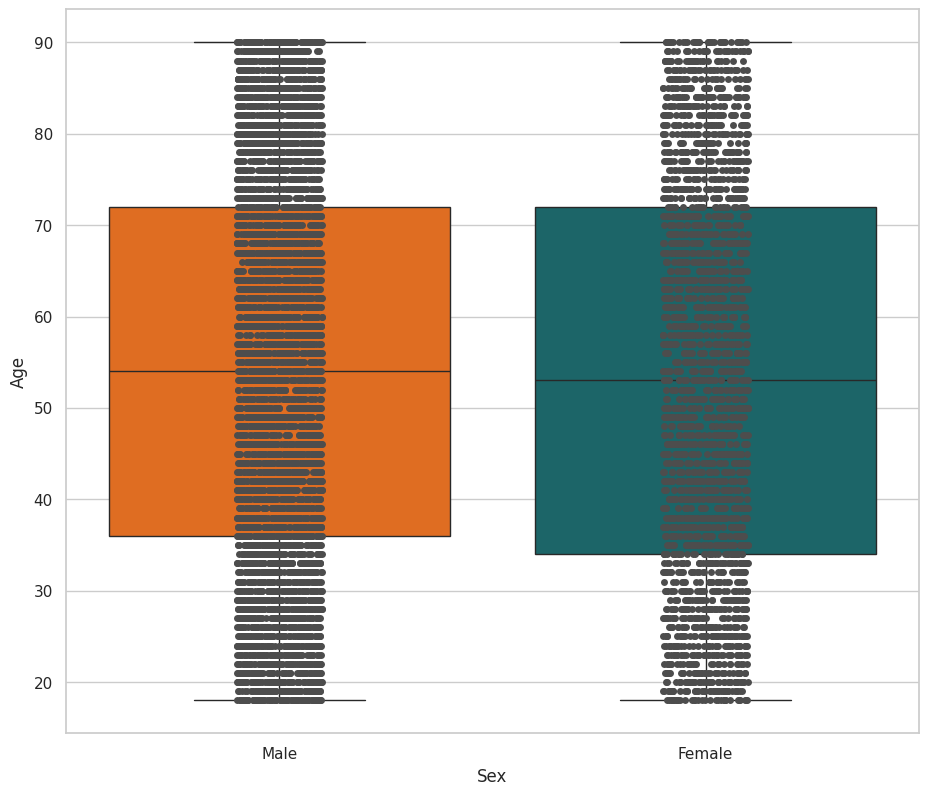

In [35]:
ax = sns.boxplot(
    data=df_ataque,
    x='Sex',
    y='Age',
    palette=sex_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=df_ataque,
    x='Sex',
    y='Age',
    color='.3'
)


<ipython-input-37-13794382748f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(


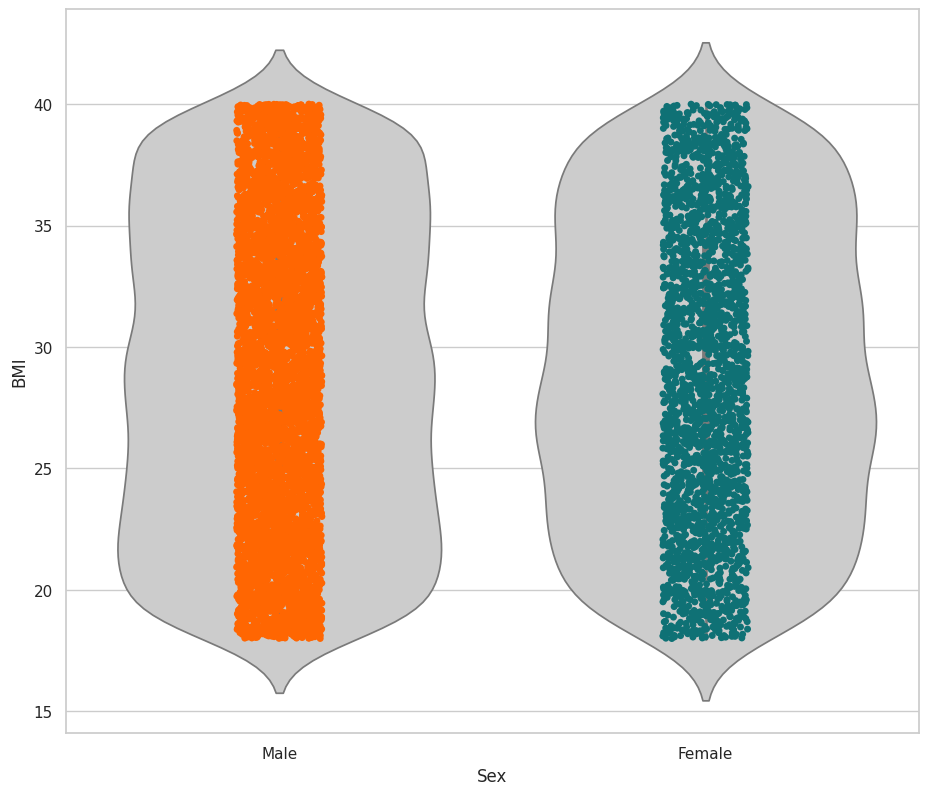

In [37]:
ax = sns.violinplot(
    data=df_ataque,
    x='Sex',
    y='BMI',
    color='.8'
)

ax = sns.stripplot(
    data=df_ataque,
    x='Sex',
    y='BMI',
    palette=sex_color
)